In [1]:
import numpy                as np
import matplotlib.pyplot    as plt
from astropy import units   as units
from matplotlib             import rcParams, rc
import matplotlib           as mpl
from scipy.interpolate  import interp1d
from os import listdir
from tqdm import tqdm


# Change the matplotlib default parameters
rcParams.update({'font.size':   8})
rcParams.update({'figure.dpi': 120})

outpath = '/lhome/silkem/ChemTorch/ChemTorch/out/'

In [2]:
success = listdir(outpath+'success/')
fail = listdir(outpath+'fail/')

In [8]:
for i, dir in enumerate(success):
    if dir == '2023-08-28 14:18:09.017178':
        el = i
    # else:
    #     el = 'Not found'

print('before restart 1 # success: ', el)
print('before restart 1 # fail:   ', 41969)
print('       restart 2 # success:', 18734)


before restart 1 # success:  6150
before restart 1 # fail:    41969
       restart 2 # success: 18734


100%|██████████| 18465/18465 [04:05<00:00, 75.11it/s] 


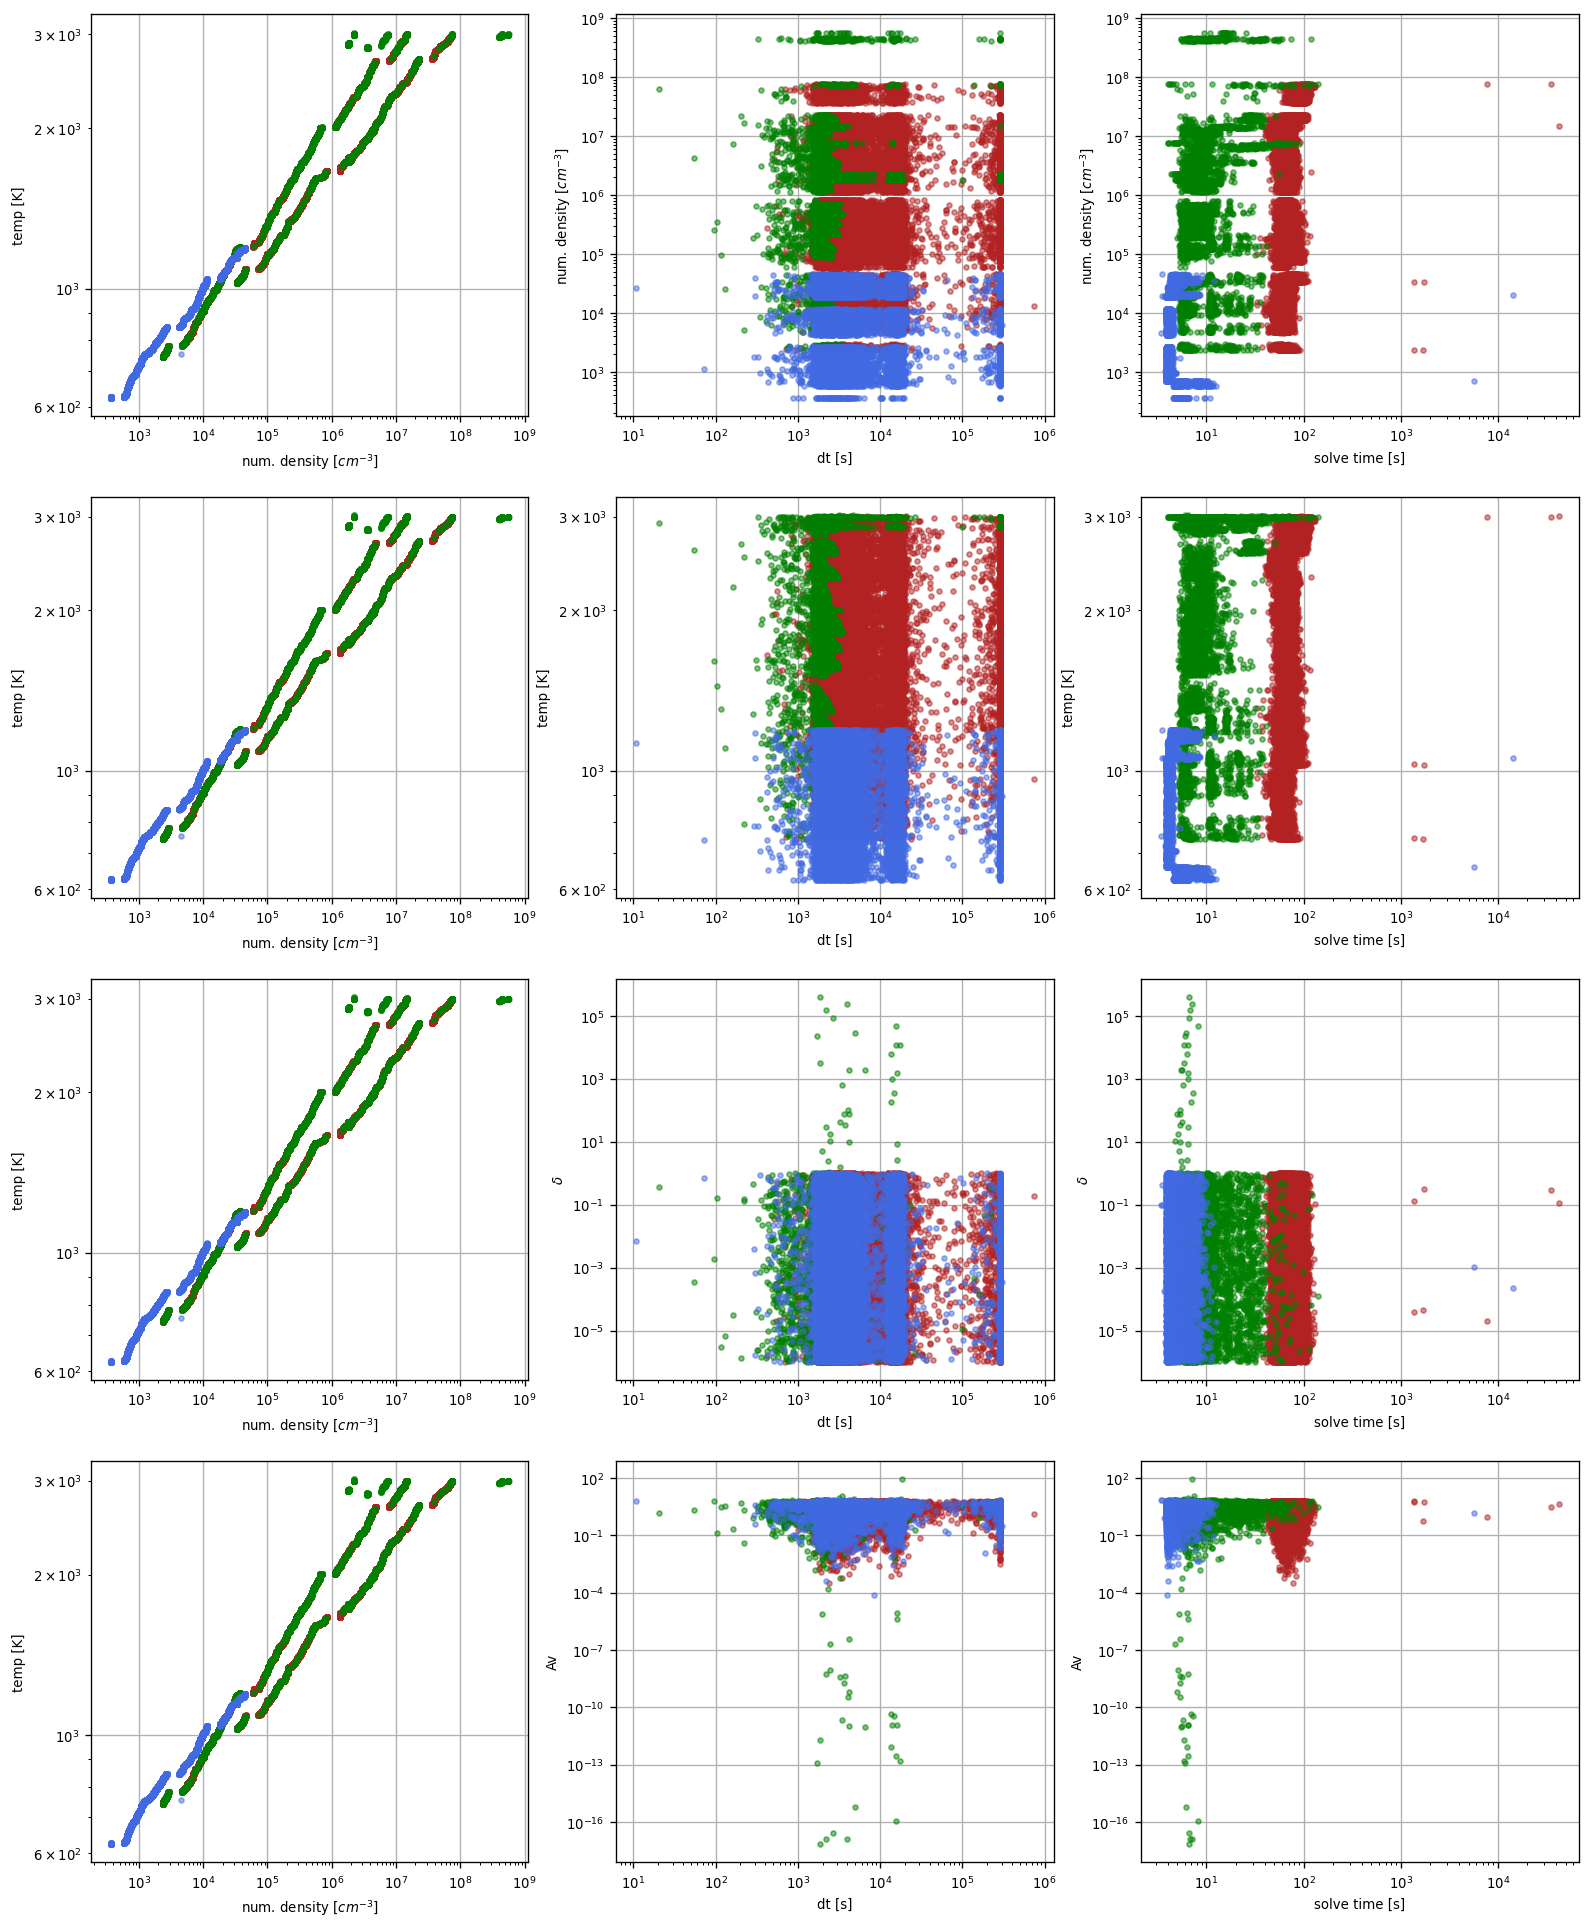

In [3]:
fig, ax = plt.subplots(4,3, figsize=(16, 20))

m_fail = '.'
c_fail = 'firebrick'
alpha = 0.5

dt = 0

print(">> Plotting failed models...")
for i in tqdm(range(len(fail))):
    input  = np.load(outpath+'fail/'+fail[i]+'/input.npy')
    tictoc = np.load(outpath+'fail/'+fail[i]+'/tictoc.npy')

   
    ## parameter space
    ax[0,0].plot(input[0], input[1], color = c_fail, marker = m_fail, alpha = alpha)
    ax[1,0].plot(input[0], input[1], color = c_fail, marker = m_fail, alpha = alpha)
    ax[2,0].plot(input[0], input[1], color = c_fail, marker = m_fail, alpha = alpha)
    ax[3,0].plot(input[0], input[1], color = c_fail, marker = m_fail, alpha = alpha)

    ## density
    ax[0,1].plot(input[-1],input[0], color = c_fail, marker = m_fail, alpha = alpha)
    ax[0,2].plot(tictoc[0],input[0], color = c_fail, marker = m_fail, alpha = alpha)

    ## temperature
    ax[1,1].plot(input[-1],input[1], color = c_fail, marker = m_fail, alpha = alpha)
    ax[1,2].plot(tictoc[0],input[1], color = c_fail, marker = m_fail, alpha = alpha)

    ## delta
    ax[2,1].plot(input[-1],input[2], color = c_fail, marker = m_fail, alpha = alpha)
    ax[2,2].plot(tictoc[0],input[2], color = c_fail, marker = m_fail, alpha = alpha)

    ## Av
    ax[3,1].plot(input[-1],input[3], color = c_fail, marker = m_fail, alpha = alpha)
    ax[3,2].plot(tictoc[0],input[3], color = c_fail, marker = m_fail, alpha = alpha)


m_suc = '.'
c_suc = 'green'

print("\n>> Plotting succesful models...")
for i in tqdm(range(len(success))):
    input  = np.load(outpath+'success/'+success[i]+'/input.npy')
    tictoc = np.load(outpath+'success/'+success[i]+'/tictoc.npy')


    if i < 6150:
        c_suc = 'green'
    elif i >= 6150:
        c_suc = 'royalblue'
    
    ## parameter space
    ax[0,0].plot(input[0], input[1], color = c_suc, marker = m_suc, alpha = alpha)
    ax[1,0].plot(input[0], input[1], color = c_suc, marker = m_suc, alpha = alpha)
    ax[2,0].plot(input[0], input[1], color = c_suc, marker = m_suc, alpha = alpha)
    ax[3,0].plot(input[0], input[1], color = c_suc, marker = m_suc, alpha = alpha)

    ## density
    ax[0,1].plot(input[-1],input[0], color = c_suc, marker = m_suc, alpha = alpha)
    ax[0,2].plot(tictoc[0],input[0], color = c_suc, marker = m_suc, alpha = alpha)

    ## temperature
    ax[1,1].plot(input[-1],input[1], color = c_suc, marker = m_suc, alpha = alpha)
    ax[1,2].plot(tictoc[0],input[1], color = c_suc, marker = m_suc, alpha = alpha)

    ## delta
    ax[2,1].plot(input[-1],input[2], color = c_suc, marker = m_suc, alpha = alpha)
    ax[2,2].plot(tictoc[0],input[2], color = c_suc, marker = m_suc, alpha = alpha)

    ## Av
    ax[3,1].plot(input[-1],input[3], color = c_suc, marker = m_suc, alpha = alpha)
    ax[3,2].plot(tictoc[0],input[3], color = c_suc, marker = m_suc, alpha = alpha)

print('\n>> Setting figure options...')
for i in tqdm(range(len(ax))):
    for j in tqdm(range(len(ax[i]))):
        ax[i,j].set_xscale('log')
        ax[i,j].set_yscale('log')    
        ax[i,j].grid(True)

for i in tqdm(range(4)):
    ax[i,0].set_xlabel('num. density [$cm^{-3}$]')
    ax[i,0].set_ylabel('temp [K]')
    ax[i,1].set_xlabel('dt [s]')
    ax[i,2].set_xlabel('solve time [s]')


## density
ax[0,1].set_ylabel('num. density [$cm^{-3}$]')
ax[0,2].set_ylabel('num. density [$cm^{-3}$]')

## temperature
ax[1,1].set_ylabel('temp [K]')
ax[1,2].set_ylabel('temp [K]')

## delta
ax[2,1].set_ylabel('$\\delta$')
ax[2,2].set_ylabel('$\\delta$')

## Av
ax[3,1].set_ylabel('Av')
ax[3,2].set_ylabel('Av')

plt.show()
    

In [ ]:
## plotting solve time via colormap

colors = mpl.cm.viridis(np.logspace(0, 1, ))


fig, ax = plt.subplots(1,2, gridspec_kw={'width_ratios': [18,1]},figsize=(10, 8))

for i,dir in enumerate(success):
    input  = np.load(outpath+'success/'+dir+'/input.npy' )
    tictoc = np.load(outpath+'success/'+dir+'/tictoc.npy')

    if i < 6150:
        c_suc = 'green'
    elif i >= 6150:
        c_suc = 'royalblue'


    ax[0].plot(input[0], input[1], color = c_suc, marker = m_suc, alpha = alpha)

